In this notebook we run a control loop and synchronously record data.

We can first try doing this in the same python process, in the same loop.

Some boilerplate code to bringup the robots:

In [4]:
# Cross-notebook include shim
with open("nbinclude.ipynb") as nbinclude_f: # don't rename nbinclude_f
    import IPython.nbformat.current
    get_ipython().run_cell(IPython.nbformat.current.read(nbinclude_f, 'json').worksheets[0].cells[0].input)

In [5]:
nbinclude('Narwhal')
cid = vrep.simxStart('127.0.0.1',19990,True,True,5000,5)
n0 = Narwhal(0,cid)
n1 = Narwhal(1,cid)
narwhals=Narwhal.all_narwhals.values()

Populating the interactive namespace from numpy and matplotlib


In [6]:
%matplotlib inline

In [121]:
traj = np.ndarray(shape=(len(ts), 5))
images = np.ndarray(shape=(10000, 128*3))

```
0. Time
1. X position
2. Y Position
3. Neck angle
4. Control signal Neck
```

In [123]:
vrep.simxStartSimulation(Narwhal.cid, vrep.simx_opmode_oneshot_wait)

img = np.array(n0.get_linescan())
while sum(img) is 0:
    img = np.array(n0.get_linescan())
    time.sleep(.1)
center = img.shape[0]/2
# print img

n0.drive(5., 5.)

t0 = time.time()
t = time.time() - t0
for i in xrange(images.shape[0]):
    
    t = time.time() - t0
    
    # process image 
    img = np.array(n0.get_linescan())
    com = scipy.ndimage.measurements.center_of_mass(img)[0]
    if math.isnan(com):
        com = center
    
    # act
    error = center - com
    vel = .1 * error
    n0.set_neck_vel(vel)
    
    #record state
    x,y,z = n0._get_position('zumo')
    angle = n0.get_neck_pos()
    traj[i] = t, x, y, angle, vel
    images[i] = img
    
    time.sleep(.001)
vrep.simxStopSimulation(Narwhal.cid, vrep.simx_opmode_oneshot_wait)

0

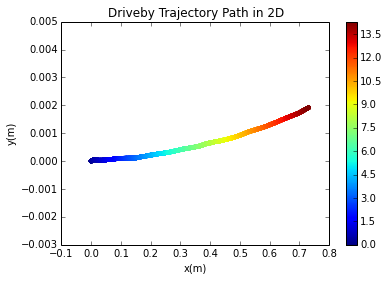

In [129]:
plt.scatter(traj.T[1],
            traj.T[2],
            linewidths=0,
            c=traj.T[0])
plt.colorbar() # Color is time.
plt.title('Driveby Trajectory Path in 2D')
plt.xlabel('x(m)')
plt.ylabel('y(m)')

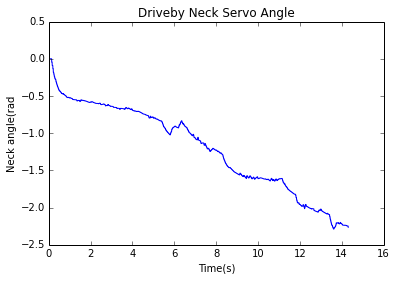

In [130]:
plt.plot(traj.T[0], traj.T[3])
plt.title('Driveby Neck Servo Angle')
plt.xlabel('Time(s)')
plt.ylabel('Neck angle(rad')

In [128]:
data_dict = {'images':images, 'traj':traj, 'U_l':5, 'U_r':5}

In [131]:
import pickle
f = open('driveby_traj.pkl', 'w')
pickle.dump(data_dict, f)
f.close()

In [132]:
!du -h driveby_traj.pkl

119M	driveby_traj.pkl


In [1]:
!gzip driveby_traj.pkl

In [2]:
!du -h driveby_traj.pkl.gz

332K	driveby_traj.pkl.gz
